<a href="https://colab.research.google.com/github/bnv20/Caba_nlp/blob/main/nlp_Text_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)

## NLP, 텍스트 분석
- Natural Language Processing : 기계가 인간의 언어를 이해하고 해석하는데 중점. 기계번역, 질의응답시스템
- 텍스트 분석 : 비정형 텍스트에서 의미있는 정보를 추출하는 것에 중점
- NLP는 텍스트 분석을 향상하게 하는 기반 기술
- NLP와 텍스트 분석의 근간에는 머신러닝이 존재. 과거 언어적인 룰 기반 시스템에서 텍스트 데이터 기반으로 모델을 학습하고 예측
- 텍스트 분석은 머신러닝, 언어 이해, 통계 등을 활용한 모델 수립, 정보 추출을 통해 인사이트 및 예측 분석 등의 분석 작업 수행
 - 텍스트 분류 : 신문기사 카테고리 분류, 스팸 메일 검출 프로그램. 지도학습
 - 감성 분석 : 감정/판단/믿음/의견/기분 등의 주관적 요소 분석. 소셜미디어 감정분석, 영화 리뷰, 여론조사 의견분석. 지도학습, 비지도학습
 - 텍스트 요약 : 텍스트 내에서 중요한 주제나 중심 사상을 추출. 토픽 모델링
 - 텍스트 군집화와 유사도 측정 : 비슷한 유형의 문서에 대해 군집화 수행. 비지도 학습
 
#### Text 분석 수행 프로세스
- 텍스트 정규화
 - 클랜징, 토큰화, 필터링/스톱워드 제거/철자 수정, Stemming, Lemmatization
- 피처 벡터화 변환
 - Bag of Words : Count 기반, TF-IDF 기반
 - Word2Vec
- ML 모델 수립 및 학습/예측/평가

#### 텍스트 전처리 - 텍스트 정규화
- 클렌징 : 분석에 방해되는 불필요한 문자, 기호를 사전에 제거. HTML, XML 태그나 특정 기호
- 토큰화 : 문서에서 문장을 분리하는 문장 토큰화와 문장에서 단어를 토큰으로 분리하는 단어 토큰화
- 필터링/스톱워드 제거/철자 수정 : 분석에 큰 의미가 없는 단어를 제거
- Stemming, Lemmatization : 문법적 또는 의미적으로 변화하는 단어의 원형을 찾음
 - Stemming은 원형 단어로 변환 시 일반적인 방법을 적용하거나 더 단순화된 방법을 적용
 - Lemmatization이 Stemming 보다 정교하며 의미론적인 기반에서 단어의 원형을 찾음

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# conda install nltk (토큰화를 위한 API 제공)
# Punkt Sentence Tokenizer. This tokenizer divides a text into a list of sentences, 
# by using an unsupervised algorithm to build a model for abbreviation words, 
# collocations, and words that start sentences. 
# It must be trained on a large collection of plaintext in the target language before it can be used.

In [2]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
# 문장 토큰화(sent tokenize) : 마침표, 개행문자(\n), 정규표현식
from nltk import sent_tokenize
text_sample = 'The Matrix is everywhere its all around us, here even in this room. \
               You can see it out your window or on your television. \
               You feel it when you go to work, or go to church or pay your taxes.'
sentences = sent_tokenize(text=text_sample)
print(sentences)
print(type(sentences), len(sentences))

['The Matrix is everywhere its all around us, here even in this room.', 'You can see it out your window or on your television.', 'You feel it when you go to work, or go to church or pay your taxes.']
<class 'list'> 3


In [4]:
# 단어 토큰화(word_tokenize) : 공백, 콤마, 마침표, 개행문자, 정규표현식
from nltk import word_tokenize 

sentence = 'The Matrix is everywhere its all around us, here even in this room.'
words = word_tokenize(sentence)
print(words)
print(type(words),len(words))

['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.']
<class 'list'> 15


In [ ]:
# 문서에 대해서 모든 단어를 토큰화
from nltk import word_tokenize, sent_tokenize

def tokenize_text(text):
    sentences = sent_tokenize(text) # 문장별 분리 토큰
    word_tokens = [word_tokenize(sentence) for sentence in sentences] # 문장별 단어 토큰화
    return word_tokens

word_tokens = tokenize_text(text_sample)
print(word_tokens)
print(type(word_tokens), len(word_tokens))   

[['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.'], ['You', 'can', 'see', 'it', 'out', 'your', 'window', 'or', 'on', 'your', 'television', '.'], ['You', 'feel', 'it', 'when', 'you', 'go', 'to', 'work', ',', 'or', 'go', 'to', 'church', 'or', 'pay', 'your', 'taxes', '.']]
<class 'list'> 3


In [ ]:
# 스톱 워드 제거 : is, the, a, will 와 같이 문맥적으로 큰 의미가 없는 단어를 제거
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kevin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# NLTK의 english stopwords 갯수 확인
print('영어 stop words 갯수:', len(nltk.corpus.stopwords.words('english')))
print(nltk.corpus.stopwords.words('english')[:20])

영어 stop words 갯수: 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


In [ ]:
# stopwords 필터링을 통한 제거
import nltk
stopwords = nltk.corpus.stopwords.words('english')
all_tokens =[]
for sentence in word_tokens:
    filtered_words = []
    for word in sentence:
        word = word.lower()
        if word not in stopwords:
            filtered_words.append(word)
    all_tokens.append(filtered_words)
print(all_tokens)       

[['matrix', 'everywhere', 'around', 'us', ',', 'even', 'room', '.'], ['see', 'window', 'television', '.'], ['feel', 'go', 'work', ',', 'go', 'church', 'pay', 'taxes', '.']]


In [ ]:
# 문법적 또는 의미적으로 변화하는 단어의 원형을 찾는 방법 : Stemming, Lemmatization
# Stemmer(LancasterStemmer)
from nltk.stem import LancasterStemmer
stemmer = LancasterStemmer()

print(stemmer.stem('working'), stemmer.stem('works'), stemmer.stem('worked'))
print(stemmer.stem('amusing'), stemmer.stem('amuses'), stemmer.stem('amused'))
print(stemmer.stem('happier'), stemmer.stem('happiest'))
print(stemmer.stem('fancier'), stemmer.stem('fanciest'))

work work work
amus amus amus
happy happiest
fant fanciest


In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kevin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Lemmatization(WordNetLemmatizer) : 정확한 원형 단어 추출을 위해 단어의 품사를 입력
from nltk.stem.wordnet import WordNetLemmatizer

lemma = WordNetLemmatizer()
print(lemma.lemmatize('amusing', 'v'),lemma.lemmatize('amuses','v'),lemma.lemmatize('amused','v'))
print(lemma.lemmatize('happier','a'),lemma.lemmatize('happiest','a'))
print(lemma.lemmatize('fancier','a'),lemma.lemmatize('fanciest','a'))

amuse amuse amuse
happy happy
fancy fancy


#### 피처 벡터화 : One-hot encoding
- Bag of Words : 문맥이나 순서를 무시하고 일괄적으로 단어에 대한 빈도 값을 부여해 피처 값을 추출하는 모델
- 단점 : 문맥 의미 반영 부족, 희소 행렬 문제
- BOW에서 피처 벡터화 : 모든 단어를 컬럼 형태로 나열하고 각 문서에서 해당 단어의 횟수나 정규화된 빈도를 값으로 부여하는 데이터 세트 모델로 변경하는 것
- 피처 벡터화 방식 : 카운트 기반, TF-IDF(Term Frequency - Inverse Document Frequency) 기반 벡터화
- 카운트 벡터화 : 카운트 값이 높을수록 중요한 단어로 인식. 특성상 자주 사용되는 보편적인 단어까지 높은 값 부여
- TF-IDF : 모든 문서에서 전반적으로 자주 나타나는 단어에 대해서 패널티 부여. '빈번하게', '당연히', '조직', '업무' 등
- 파라미터
  - max_df : 너무 높은 빈도수를 가지는 단어 피처를 제외
  - min_df : 너무 낮은 빈도수를 가지는 단어 피처를 제외
  - max_features : 추출하는 피처의 개수를 제한하며 정수로 값을 지정
  - stop_words : 'english'로 지정하면 스톱 워드로 지정된 단어는 추출에서 제외
  - n_gram_range : 튜플 형태로 (범위 최솟값, 범위 최댓값)을 지정
  - analyzer : 피처 추출을 수행하는 단위. 디폴트는 'word'
  - token_pattern : 토큰화를 수행하는 정규 표현식 패턴을 지정
  - tokenizer : 토큰화를 별도의 커스텀 함수로 이용시 적용

In [ ]:
# ndarray 객체 생성
import numpy as np
dense = np.array([[3,0,1],[0,2,0]])
dense

array([[3, 0, 1],
       [0, 2, 0]])

In [ ]:
# 희소 행렬 - COO 형식 : 0이 아닌 데이터만 별도의 데이터 배열에 저장하고 행과 행의 위치를 별도의 배열로 
# 저장
# 희소 행렬 변환을 위해 scipy sparse 패키지를 이용
from scipy import sparse
data = np.array([3,1,2])
row_pos = np.array([0,0,1]) # dense 2차원 배열에서 0이 아닌 데이터의 위치를 (row, col)로 표시
col_pos = np.array([0,2,1])
sparse_coo = sparse.coo_matrix((data,(row_pos,col_pos)))
print(sparse_coo)
# sparse_coo.toarray()

  (0, 0)	3
  (0, 2)	1
  (1, 1)	2


In [ ]:
# 희소 행렬 - CSR 형식 : COO 형식의 반복적인 위치 데이터를 사용하는 문제점을 보완. 
# 반복 제거(위치의 위치를 표기), 메모리 적게 들고 빠른 연산 가능
import numpy as np
from scipy import sparse
dense2 = np.array([[0,0,1,0,0,5],
                   [1,4,0,3,2,5],
                   [0,6,0,3,0,0],
                   [2,0,0,0,0,0],
                   [0,0,0,7,0,8],
                   [1,0,0,0,0,0]])
data2 = np.array([1, 5, 1, 4, 3, 2, 5, 6, 3, 2, 7, 8, 1])

row_pos = np.array([0, 0, 1, 1, 1, 1, 1, 2, 2, 3, 4, 4, 5])
col_pos = np.array([2, 5, 0, 1, 3, 4, 5, 1, 3, 0, 3, 5, 0])
# COO 형식으로 변환
sparse_coo = sparse.coo_matrix((data2,(row_pos,col_pos)))
# sparse_coo = sparse.coo_matrix(dense2)
# 행 위치 배열의 고유한 값들의 시작 위치 인덱스를 배열로 생성
row_pos_ind = np.array([0,2,7,9,10,12,13])
# CSR 형식으로 변환
sparse_csr = sparse.csr_matrix((data2, col_pos,row_pos_ind))
# sparse_csr = sparse.csr_matrix(dense2)
print(sparse_coo)
print(sparse_coo.toarray())
print()
print(sparse_csr)
print(sparse_csr.toarray())
# print(sparse_csr)

  (0, 2)	1
  (0, 5)	5
  (1, 0)	1
  (1, 1)	4
  (1, 3)	3
  (1, 4)	2
  (1, 5)	5
  (2, 1)	6
  (2, 3)	3
  (3, 0)	2
  (4, 3)	7
  (4, 5)	8
  (5, 0)	1
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]

  (0, 2)	1
  (0, 5)	5
  (1, 0)	1
  (1, 1)	4
  (1, 3)	3
  (1, 4)	2
  (1, 5)	5
  (2, 1)	6
  (2, 3)	3
  (3, 0)	2
  (4, 3)	7
  (4, 5)	8
  (5, 0)	1
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]


In [ ]:
# 밀집 행렬을 생성 파라미터로 입력하면 COO, CSR 희소 행렬로 생성
dense3 = np.array([[0,0,1,0,0,5],
                   [1,4,0,3,2,5],
                   [0,6,0,3,0,0],
                   [2,0,0,0,0,0],
                   [0,0,0,7,0,8],
                   [1,0,0,0,0,0]])

coo = sparse.coo_matrix(dense3)
csr = sparse.csr_matrix(dense3)
print(coo)
print(coo.toarray())
print()
print(csr)
print(csr.toarray())

  (0, 2)	1
  (0, 5)	5
  (1, 0)	1
  (1, 1)	4
  (1, 3)	3
  (1, 4)	2
  (1, 5)	5
  (2, 1)	6
  (2, 3)	3
  (3, 0)	2
  (4, 3)	7
  (4, 5)	8
  (5, 0)	1
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]

  (0, 2)	1
  (0, 5)	5
  (1, 0)	1
  (1, 1)	4
  (1, 3)	3
  (1, 4)	2
  (1, 5)	5
  (2, 1)	6
  (2, 3)	3
  (3, 0)	2
  (4, 3)	7
  (4, 5)	8
  (5, 0)	1
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]


In [ ]:
# DictVectorizer:문서에서 단어의 사용 빈도를 나타내는 딕셔너리 정보를 입력받아 BOW 인코딩한 수치 벡터로 변환
from sklearn.feature_extraction import DictVectorizer
v = DictVectorizer(sparse=False)
D = [{'A': 1, 'B': 2}, {'B': 3, 'C': 1}]
X = v.fit_transform(D)
print(X)
print()
print(v.feature_names_)
print(v.vocabulary_)
print(v.transform({'C': 4, 'D': 3}))

[[1. 2. 0.]
 [0. 3. 1.]]

['A', 'B', 'C']
{'A': 0, 'B': 1, 'C': 2}
[[0. 0. 4.]]


In [ ]:
# CountVectorizer
# 문서를 토큰 리스트로 변환
# 각 문서에서 토큰의 출현 빈도 카운트
# 각 문서를 BOW 인코딩 벡터로 변환
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    'This is the first document.',
    'This is the second second document.',
    'And the third one.',
    'Is this the first document?',
    'The last document?',
]
vect = CountVectorizer()
vect.fit(corpus) # fit() 는 데이터를 모델에 학습시킬 때 사용.
print(vect.get_feature_names()) # 토큰 리스트로 변환
print(vect.vocabulary_) # 사전
print()
print(vect.transform(['This is the second document']).toarray()) # transform() 은 데이터를 알맞게 변형해 줌
print()
print(vect.transform(['Something completely new.']).toarray())
print()
print(vect.transform(corpus).toarray())

['and', 'document', 'first', 'is', 'last', 'one', 'second', 'the', 'third', 'this']
{'this': 9, 'is': 3, 'the': 7, 'first': 2, 'document': 1, 'second': 6, 'and': 0, 'third': 8, 'one': 5, 'last': 4}

[[0 1 0 1 0 0 1 1 0 1]]

[[0 0 0 0 0 0 0 0 0 0]]

[[0 1 1 1 0 0 0 1 0 1]
 [0 1 0 1 0 0 2 1 0 1]
 [1 0 0 0 0 1 0 1 1 0]
 [0 1 1 1 0 0 0 1 0 1]
 [0 1 0 0 1 0 0 1 0 0]]


In [ ]:
# Stop Words 는 문서에서 단어장을 생성할 때 무시할 수 있는 단어. 보통 영어의 관사나 접속사, 한국어의 조사 등
vect = CountVectorizer(stop_words=["and", "is", "the", "this"]).fit(corpus)
vect.vocabulary_

{'first': 1, 'document': 0, 'second': 4, 'third': 5, 'one': 3, 'last': 2}

In [ ]:
vect = CountVectorizer(stop_words="english").fit(corpus)
vect.vocabulary_

{'document': 0, 'second': 1}

In [ ]:
# analyzer, tokenizer, token_pattern 등의 인수로 사용할 토큰 생성기를 선택
vect = CountVectorizer(analyzer="char").fit(corpus)
vect.vocabulary_

{'t': 16,
 'h': 8,
 'i': 9,
 's': 15,
 ' ': 0,
 'e': 6,
 'f': 7,
 'r': 14,
 'd': 5,
 'o': 13,
 'c': 4,
 'u': 17,
 'm': 11,
 'n': 12,
 '.': 1,
 'a': 3,
 '?': 2,
 'l': 10}

In [ ]:
# \w : word 를 표현하며 알파벳 + 숫자 + _ 중의 한 문자임을 의미

vect = CountVectorizer(token_pattern="t\w+").fit(corpus)
vect.vocabulary_

{'this': 2, 'the': 0, 'third': 1}

In [ ]:
# word_tokenize( )는 space 단위와 구두점(punctuation)을 기준으로 토큰화(Tokenize)

import nltk

vect = CountVectorizer(tokenizer=nltk.word_tokenize).fit(corpus)
vect.vocabulary_

C:\anaconda3\envs\ca_ba\lib\site-packages\sklearn\feature_extraction\text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


{'this': 11,
 'is': 5,
 'the': 9,
 'first': 4,
 'document': 3,
 '.': 0,
 'second': 8,
 'and': 2,
 'third': 10,
 'one': 7,
 '?': 1,
 'last': 6}

In [ ]:
# n-그램은 단어장 생성에 사용할 토큰의 크기를 결정
# 모노그램(1-그램)은 토큰 하나만 단어로 사용하며 바이그램(2-그램)은 두 개의 연결된 토큰을 하나의 단어로 사용
vect = CountVectorizer(ngram_range=(1,2)).fit(corpus)
vect.vocabulary_

{'this': 21,
 'is': 5,
 'the': 14,
 'first': 3,
 'document': 2,
 'this is': 22,
 'is the': 6,
 'the first': 15,
 'first document': 4,
 'second': 11,
 'the second': 17,
 'second second': 13,
 'second document': 12,
 'and': 0,
 'third': 19,
 'one': 10,
 'and the': 1,
 'the third': 18,
 'third one': 20,
 'is this': 7,
 'this the': 23,
 'last': 8,
 'the last': 16,
 'last document': 9}

In [ ]:
vect = CountVectorizer(ngram_range=(1, 2), token_pattern="t\w+").fit(corpus)
vect.vocabulary_

{'this': 3, 'the': 0, 'this the': 4, 'third': 2, 'the third': 1}

In [ ]:
# max_df, min_df 인수를 사용하여 문서에서 토큰이 나타난 횟수를 기준으로 단어장을 구성
vect = CountVectorizer(max_df=4, min_df=2).fit(corpus)
vect.vocabulary_, vect.stop_words_

({'this': 3, 'is': 2, 'first': 1, 'document': 0},
 {'and', 'last', 'one', 'second', 'the', 'third'})

In [ ]:
print(vect.transform(corpus).toarray())
vect.transform(corpus).toarray().sum(axis=0)

[[1 1 1 1]
 [1 0 1 1]
 [0 0 0 0]
 [1 1 1 1]
 [1 0 0 0]]


array([4, 2, 3, 3], dtype=int64)

TF-IDF(Term Frequency – Inverse Document Frequency) 인코딩은 단어를 갯수 그대로 카운트하지 않고 
모든 문서에 공통적으로 들어있는 단어의 경우 문서 구별 능력이 떨어진다고 보아 가중치를 축소
문서 d(document)와 단어 t 에 대해 다음과 같이 계산  

tf-idf(d,t)=tf(d,t)⋅idf(t)

tf(d,t): term frequency. 특정한 단어의 빈도수  
idf(t) : inverse document frequency. 특정한 단어가 들어 있는 문서의 수에 반비례하는 수  
n : 전체 문서의 수  
df(t) : 단어  t 를 가진 문서의 수  
idf(d,t)=log(n/(1+df(t))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidv = TfidfVectorizer(max_df=4, min_df=2).fit(corpus)
tfidv.transform(corpus).toarray()

array([[0.41250005, 0.59072194, 0.49035258, 0.49035258],
       [0.51123153, 0.        , 0.60771799, 0.60771799],
       [0.        , 0.        , 0.        , 0.        ],
       [0.41250005, 0.59072194, 0.49035258, 0.49035258],
       [1.        , 0.        , 0.        , 0.        ]])

In [ ]:
# 문서에 대해서 모든 단어를 토큰화, english stop word 제거
from nltk import word_tokenize, sent_tokenize
import nltk
def tokenize_text(text):

    sentences = sent_tokenize(text) # 문장별 분리 토큰
    word_tokens = [word_tokenize(sentence) for sentence in sentences] # 문장별 단어 토큰화
    return word_tokens
corpus = '''
A vacuum of knowledge about the origins of the new coronavirus ravaging the world has provided fertile 
ground for all manner of theories -- from the fantastic, to the dubious to the believable.
It was a bioweapon manufactured by the Chinese. The US Army brought the virus to Wuhan. 
It leaked -- like a genie out of a bottle -- from a lab in an accident. 
It took root at a wildlife market in Wuhan.
'''

word_tokens = tokenize_text(corpus)

# stopwords 필터링을 통한 제거
stopwords = nltk.corpus.stopwords.words('english')
all_tokens =[]
for sentence in word_tokens:
    filtered_words = []
    for word in sentence:
        word = word.lower()
        if word not in stopwords:
            filtered_words.append(word)
    all_tokens.append(filtered_words)
print(all_tokens)
print(type(all_tokens), len(all_tokens)) 

[['vacuum', 'knowledge', 'origins', 'new', 'coronavirus', 'ravaging', 'world', 'provided', 'fertile', 'ground', 'manner', 'theories', '--', 'fantastic', ',', 'dubious', 'believable', '.'], ['bioweapon', 'manufactured', 'chinese', '.'], ['us', 'army', 'brought', 'virus', 'wuhan', '.'], ['leaked', '--', 'like', 'genie', 'bottle', '--', 'lab', 'accident', '.'], ['took', 'root', 'wildlife', 'market', 'wuhan', '.']]
<class 'list'> 5


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = [ '''
A vacuum of knowledge about the origins of the new coronavirus ravaging the world has provided fertile 
ground for all manner of theories -- from the fantastic, to the dubious to the believable.
It was a bioweapon manufactured by the Chinese. The US Army brought the virus to Wuhan. 
It leaked -- like a genie out of a bottle -- from a lab in an accident. 
It took root at a wildlife market in Wuhan.
''']


vect = CountVectorizer(stop_words="english")
vect.fit(corpus) # fit() 는 데이터를 모델에 학습시킬 때 사용.
print(vect.get_feature_names())
print(vect.vocabulary_)

print(vect.transform(['This is the second document']).toarray())

['accident', 'army', 'believable', 'bioweapon', 'bottle', 'brought', 'chinese', 'coronavirus', 'dubious', 'fantastic', 'fertile', 'genie', 'ground', 'knowledge', 'lab', 'leaked', 'like', 'manner', 'manufactured', 'market', 'new', 'origins', 'provided', 'ravaging', 'root', 'theories', 'took', 'vacuum', 'virus', 'wildlife', 'world', 'wuhan']
{'vacuum': 27, 'knowledge': 13, 'origins': 21, 'new': 20, 'coronavirus': 7, 'ravaging': 23, 'world': 30, 'provided': 22, 'fertile': 10, 'ground': 12, 'manner': 17, 'theories': 25, 'fantastic': 9, 'dubious': 8, 'believable': 2, 'bioweapon': 3, 'manufactured': 18, 'chinese': 6, 'army': 1, 'brought': 5, 'virus': 28, 'wuhan': 31, 'leaked': 15, 'like': 16, 'genie': 11, 'bottle': 4, 'lab': 14, 'accident': 0, 'took': 26, 'root': 24, 'wildlife': 29, 'market': 19}
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidv = TfidfVectorizer(stop_words="english").fit(corpus)
print(tfidv.get_feature_names())
print(tfidv.vocabulary_)
print()
print(tfidv.transform(['This is the second document']).toarray())
tfidv.transform(corpus).toarray()

['accident', 'army', 'believable', 'bioweapon', 'bottle', 'brought', 'chinese', 'coronavirus', 'dubious', 'fantastic', 'fertile', 'genie', 'ground', 'knowledge', 'lab', 'leaked', 'like', 'manner', 'manufactured', 'market', 'new', 'origins', 'provided', 'ravaging', 'root', 'theories', 'took', 'vacuum', 'virus', 'wildlife', 'world', 'wuhan']
{'vacuum': 27, 'knowledge': 13, 'origins': 21, 'new': 20, 'coronavirus': 7, 'ravaging': 23, 'world': 30, 'provided': 22, 'fertile': 10, 'ground': 12, 'manner': 17, 'theories': 25, 'fantastic': 9, 'dubious': 8, 'believable': 2, 'bioweapon': 3, 'manufactured': 18, 'chinese': 6, 'army': 1, 'brought': 5, 'virus': 28, 'wuhan': 31, 'leaked': 15, 'like': 16, 'genie': 11, 'bottle': 4, 'lab': 14, 'accident': 0, 'took': 26, 'root': 24, 'wildlife': 29, 'market': 19}

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0.]]


array([[0.16903085, 0.16903085, 0.16903085, 0.16903085, 0.16903085,
        0.16903085, 0.16903085, 0.16903085, 0.16903085, 0.16903085,
        0.16903085, 0.16903085, 0.16903085, 0.16903085, 0.16903085,
        0.16903085, 0.16903085, 0.16903085, 0.16903085, 0.16903085,
        0.16903085, 0.16903085, 0.16903085, 0.16903085, 0.16903085,
        0.16903085, 0.16903085, 0.16903085, 0.16903085, 0.16903085,
        0.16903085, 0.3380617 ]])

### 형태소 : 의미를 가지는 요소로서는 더 이상 분석할 수 없는 가장 작은 말의 단위
### KoNLPy는 시중에 공개된 hannanum, kkma, okt, komoran, mecab 다섯개 형태소 분석기를 한꺼번에 묶어서 편리하게 사용할 수 있도록 한 패키지
### okt
- morphs(phrase, norm=False, stem=False)\
  Parse phrase to morphemes.
- nouns(phrase)  
- phrases(phrase)  
- pos(phrase, norm=False, stem=False, join=False)\
  매개 변수:\
  norm -- If True, normalize tokens.\
  stem -- If True, stem tokens.\
  join -- If True, returns joined sets of morph and tag
 
- 파싱(Parsing)
 - 일련의 문자열을 의미있는 token(어휘 분석의 단위)으로 분해하고 그것들로 이루어진 Parse tree를 만드는 과정
 - 어떤 문장을 분석하거나 문법적 관계를 해석하는 행위
 - 프로그램을  compile하는 과정에서 특정 프로그래밍 언어가 제시하는 문법을 잘 지켜서 작성하였는지 compiler가 검사하는 것

In [ ]:
# KoNLPy 설치
# Java 환경 세팅, JPype1 다운로드 받고 설치(conda -c conda-forge jpype1)
# pip install konlpy

In [6]:
!pip install jpype1

     |████████████████████████████████| 460kB 17.1MB/s 


In [7]:
pip install konlpy

     |████████████████████████████████| 19.4MB 1.2MB/s 
     |████████████████████████████████| 92kB 14.9MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [8]:
# 형태소 분석으로 문장을 단어로 분할
from konlpy.tag import Okt
okt = Okt()

print(okt.morphs('단독입찰보다 복수입찰의 경우'))
print()
print(okt.nouns('유일하게 항공기 체계 종합개발 경험을 갖고 있는 KAI는'))
print()
print(okt.pos('아름다운 꽃과 파란 하늘'))
print()
print(okt.phrases('날카로운 분석과 신뢰감 있는 진행으로'))
print()
# norm 옵션 : '되나욬' 처럼 작성시 '되나요'로 변환
print(okt.pos('이것도 되나욬ㅋㅋ', norm=True))
print()
# stem 옵션 : '되나욬' 처럼 작성시 '되다'로 원형을 찾아줌
print(okt.pos('이것도 되나욬ㅋㅋ', norm=True, stem=True))
print()
# join 옵션 : joined sets of morph and tag
print(okt.pos('이것도 되나욬ㅋㅋ', norm=True, stem=True, join=True))

['단독', '입찰', '보다', '복수', '입찰', '의', '경우']

['항공기', '체계', '종합', '개발', '경험']

[('아름다운', 'Adjective'), ('꽃', 'Noun'), ('과', 'Josa'), ('파란', 'Noun'), ('하늘', 'Noun')]

['날카로운 분석', '날카로운 분석과 신뢰감', '날카로운 분석과 신뢰감 있는 진행', '분석', '신뢰', '진행']

[('이', 'Determiner'), ('것', 'Noun'), ('도', 'Josa'), ('되나요', 'Verb'), ('ㅋㅋ', 'KoreanParticle')]

[('이', 'Determiner'), ('것', 'Noun'), ('도', 'Josa'), ('되다', 'Verb'), ('ㅋㅋ', 'KoreanParticle')]

['이/Determiner', '것/Noun', '도/Josa', '되다/Verb', 'ㅋㅋ/KoreanParticle']


In [ ]:
# 형용사인 품사만 선별해 리스트에 담기

from konlpy.tag import Okt
okt = Okt()

morph = okt.pos('아름다운 꽃과 파란 하늘')
print(morph)
adj_list = []
for word, tag in morph:
    if tag == 'Adjective':
        adj_list.append(word)
print(adj_list)

[('아름다운', 'Adjective'), ('꽃', 'Noun'), ('과', 'Josa'), ('파란', 'Noun'), ('하늘', 'Noun')]
['아름다운']


In [ ]:
sentence_tag=[]
sentences = ['아름다운 꽃과 파란 하늘']

for sentence in sentences:
    morph = okt.pos(sentence)
    sentence_tag.append(morph)
    print(sentence_tag)
#     print(morph)

[[('아름다운', 'Adjective'), ('꽃', 'Noun'), ('과', 'Josa'), ('파란', 'Noun'), ('하늘', 'Noun')]]


In [ ]:
# okt.morphs, okt.pos
from konlpy.tag import Okt
okt = Okt()
malist1 = okt.nouns('나는 오늘 방콕에 가고싶다.')
malist2 = okt.pos('나는 오늘 방콕에 갔다.', norm=True, stem=True)
malist3 = okt.morphs('친절한 코치와 재미있는 친구들이 있는 도장에 가고 싶다.')
malist4 = okt.pos('나는 오늘도 장에 가고싶다.', norm=True, stem=True, join=True)
malist5 = okt.pos('나는 오늘 장에 가고싶을깤ㅋㅋ?', norm=True, stem=True)
print('명사')
print(malist1)
print('원형')
print(malist2)
print('형태소')
print(malist3)
print('형태소/태그')
print(malist4)
print('정규화, 원형')
print(malist5)

명사
['나', '오늘', '방콕']
원형
[('나', 'Noun'), ('는', 'Josa'), ('오늘', 'Noun'), ('방콕', 'Noun'), ('에', 'Josa'), ('가다', 'Verb'), ('.', 'Punctuation')]
형태소
['친절한', '코치', '와', '재미있는', '친구', '들', '이', '있는', '도장', '에', '가고', '싶다', '.']
형태소/태그
['나/Noun', '는/Josa', '오늘/Noun', '도/Josa', '장/Noun', '에/Josa', '가다/Verb', './Punctuation']
정규화, 원형
[('나', 'Noun'), ('는', 'Josa'), ('오늘', 'Noun'), ('장', 'Noun'), ('에', 'Josa'), ('가다', 'Verb'), ('ㅋㅋ', 'KoreanParticle'), ('?', 'Punctuation')]


#### 텍스트 분류
- 특정 문서의 분류를 학습 데이터를 통해 학습해 모델을 생성한 뒤 이 학습 모델을 이용해 다른 문서의 분류를 예측
- 텍스트를 피처 벡터화로 변환, 희소 행렬로 만들고 로지스틱 회귀를 이용해 분류 수행
- Count 기반 과 TF-IDF 기반의 벡터화를 각각 적용, 성능 비교
- 피처 벡터화를 위한 파라미터와 GridSearchCV 기반의 하이퍼파라미터 튜닝을 일괄적으로 수행

In [ ]:
# 데이터 가져오기
from sklearn.datasets import fetch_20newsgroups

news_data = fetch_20newsgroups(subset='all',random_state=0)
news_data.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [ ]:
import pandas as pd
print(news_data.target)
a = pd.Series(news_data.target).unique()
# a.sort()
# a
sorted(a)

[ 6  1 15 ...  0  5  8]


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [ ]:
news_data.DESCR

In [ ]:
# 텍스트 정규화
# 뉴스그룹 기사내용을 제외하고 다른 정보 제거
# 제목, 소속, 이메일 등 헤더와 푸터 정보들은 분류의 타겟 클래스 값과 유사할 수 있음

train_news = fetch_20newsgroups(subset='train', remove=('header','footer','quotes'), random_state=0)
X_train = train_news.data
y_train = train_news.target
test_news = fetch_20newsgroups(subset='test', remove=('header','footer','quotes'), random_state=0)
X_test = test_news.data
y_test = test_news.target
print(len(X_train), len(X_test))

11314 7532


In [ ]:
import pandas as pd
print(news_data.target_names)
print(pd.Series(y_test).value_counts().sort_index())

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
0     319
1     389
2     394
3     392
4     385
5     395
6     390
7     396
8     398
9     397
10    399
11    396
12    393
13    396
14    394
15    398
16    364
17    376
18    310
19    251
dtype: int64


In [ ]:
# 피처 벡터화 변환
from sklearn.feature_extraction.text import CountVectorizer
cnt_vect = CountVectorizer()
cnt_vect.fit(X_train)
X_train_cnt_vect = cnt_vect.transform(X_train)
# 학습 데이터로 fit( )된 CountVectorizer를 이용, 테스트 데이터 피처 벡터화 변환(피처 개수가 동일해야 함) 
X_test_cnt_vect = cnt_vect.transform(X_test)
print(X_train_cnt_vect.shape)
print(X_test_cnt_vect.shape)

(11314, 120756)
(7532, 120756)


In [ ]:
# 머신러닝 모델 학습/예측/평가
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

lr_clf = LogisticRegression()
lr_clf.fit(X_train_cnt_vect, y_train)
lr_pred = lr_clf.predict(X_test_cnt_vect)
print(accuracy_score(y_test,lr_pred))

0.7553106744556559


In [ ]:
# 피처 벡터화 변환 : TF-IDF 벡터화
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
tfidf_vect = TfidfVectorizer()
tfidf_vect.fit(X_train)
X_train_tfidf_vect = tfidf_vect.transform(X_train)
X_test_tfidf_vect = tfidf_vect.transform(X_test)
# 학습 / 평가
lr_clf = LogisticRegression()
lr_clf.fit(X_train_tfidf_vect, y_train)
lr_pred = lr_clf.predict(X_test_tfidf_vect)
print(accuracy_score(y_test, lr_pred))

0.7841210833775889


In [ ]:
# stop words 필터링 추가, ngram을 기본 (1,1)에서 (1,2)로 max_df=300으로 변경해 피처 벡터화 적용
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
tfidf_vect = TfidfVectorizer(stop_words='english', ngram_range=(1,2),max_df=300)
tfidf_vect.fit(X_train)
X_train_tfidf_vect = tfidf_vect.transform(X_train)
X_test_tfidf_vect = tfidf_vect.transform(X_test)

lr_clf = LogisticRegression()
lr_clf.fit(X_train_tfidf_vect, y_train)
lr_pred = lr_clf.predict(X_test_tfidf_vect)
print(accuracy_score(y_test, lr_pred))

0.774429102496017


#### Q. Random Forest, SVM을 적용 뉴스그룹에 대한 분류 예측을 수행하세요.
svm_clf = svm.SVC(kernel='rbf')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train_tfidf_vect,y_train)
rf_pred = rf_clf.predict(X_test_tfidf_vect)
print(accuracy_score(y_test,rf_pred))

0.7677907594264471


In [ ]:
from sklearn import svm
svm_clf = svm.SVC(kernel='rbf',random_state=0)
svm_clf.fit(X_train_tfidf_vect,y_train)
svm_pred = svm_clf.predict(X_test_tfidf_vect)
print(accuracy_score(y_test, svm_pred))

In [ ]:
# DT
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train_tfidf_vect,y_train)
dt_pred = dt_clf(X_test_tfidf_vect)
print(accuracy_score(y_test,dt_pred))

In [ ]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_tfidf_vect,y_train)
knn_pred = knn_clf.predict(X_test_tfidf_vect)
print(accuracy_score(y_test,knn_pred))

In [ ]:
# 30분 이상 걸림
from sklearn.model_selection import GridSearchCV
# 최적 C 값 도출 튜닝 수행. CV는 3 Fold셋으로 설정.
params = {'C':[5,10]}
gcv_lr = GridSearchCV(lr_clf, param_grid=params, cv=3, \
                          scoring='accuracy',verbose = 1)
gcv_lr.fit(X_train_tfidf_vect, y_train)
print(gcv_lr.best_params_)
# 최적 C 값으로 학습된 grid_cv로 예측 수행하고 정확도 평가.
lr_pred = gcv_lr.predict(X_test_tfidf_vect)
print(accuracy_score(y_test, lr_pred))

#### 사이킷런 파이프라인(Pipeline) 사용 및 GridSearchCV와의 결합

In [ ]:
# Pipeline 사용 
from sklearn.pipeline import Pipeline
# TfidfVectorizer 객체를 tfidf_vect 객체명으로, LogisticRegression객체를 
# lr_clf 객체명으로 생성하는 Pipeline생성
pipeline = Pipeline([
    ('tfidf_vect', TfidfVectorizer(stop_words='english',\
                                   ngram_range=(1,2),max_df=300)),\
    ('lr_clf', LogisticRegression(C=10))])
# 별도의 TfidfVectorizer객체의 fit_transform( )과 LogisticRegression의 fit(), 
# predict( )가 필요 없음. 
# pipeline의 fit( ) 과 predict( ) 만으로 한꺼번에 Feature Vectorization과 
# ML 학습/예측이 가능. 
pipeline.fit(X_train, y_train)
pred = pipeline.predict(X_test)
print(accuracy_score(y_test, pred))

In [ ]:
# 30분 이상 소요
# GridSearchCV와의 결합
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('tfidf_vect', TfidfVectorizer(stop_words='english')),
    ('lr_clf', LogisticRegression())
])
# 하이퍼파라미터명이 개게 변수명과 결합 : 피처 벡터화 객체 파라미터와 Estimator 객체의 하이퍼파라미터 구별하기 위함
params = {'tfidf_vect__ngram_range':[(1,1),(1,2),(1,3)],
         'tfidf_vect__max_df':[100,300,700],
         'lr_clf__C':[1,5,10]}

grid_cv_pipe = GridSearchCV(pipeline, param_grid=params, cv=3, \
                           scoring = 'accuracy', verbose = 1)
grid_cv_pipe.fit(X_train,y_train)
print(grid_cv_pipe.best_params_, grid_cv_pripe.best_score_)

pred = grid_cv_pipe.predict(X_test)
print(accuracy_score(y_test,pred))

#### 감성분석
- 감성분석은 문서 내 텍스트가 나타내는 여러 가지 주관적인 단어와 문맥을 기반으로 감성 수치를 계산하는 방법을 이용
- 감성 지수는 긍정 감성 지수와 부정 감성 지수로 구성되며 이들 지수를 합산해 긍정 또는 부정 감성을 결정
- 지도 학습은 학습 데이터와 타깃 레이블 값을 기반으로 감성 분석 학습을 수행한 뒤 이를 기반으로 다른 데이터의 감성 분석을 예측하는 방법
- 비지도 학습은 'Lexicon'이라는 일종의 감성 어휘 사전을 이용. Lexicon의 감성 분석을 위한 용어와 문맥에 대한 다양한 정보를 이용해 문서의 긍정적 부정적 감성 여부를 판단

In [ ]:
import pandas as pd
review_df = pd.read_csv('dataset/labeledTrainData.tsv',header=0,sep='\t',quoting=3)
print(review_df.head(3))

         id  sentiment                                             review
0  "5814_8"          1  "With all this stuff going down at the moment ...
1  "2381_9"          1  "\"The Classic War of the Worlds\" by Timothy ...
2  "7759_3"          0  "The film starts with a manager (Nicholas Bell...


In [ ]:
import warnings
warnings.filterwarnings('ignore')
from nltk.stem.wordnet import WordNetLemmatizer

rf = review_df[:5]
rf
rf['review_a'] = lemma.lemmatize('rf.review','a')
rf

,id,sentiment,review,review_a
0,"""5814_8""",1,"""With all this stuff going down at the moment ...",rf.review
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ...",rf.review
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell...",rf.review
3,"""3630_4""",0,"""It must be assumed that those who praised thi...",rf.review
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ...",rf.review


In [ ]:
review_df.review[0]

In [ ]:
# df/series에서 str 적용 문자열 연산 수행
# 파이썬의 정규 표현식 모듈인 re를 이용하여 영어 문자열이 아닌 문자는 모두 공백으로 변환
# re.sub('패턴', '바꿀문자열', '문자열', 바꿀횟수)
import re
review_df.review = review_df.review.str.replace('<br />',' ')
review_df.review = review_df.review.apply(lambda x : re.sub('[^a-zA-Z]',' ',x))
review_df.review[0]

In [ ]:
# 학습용/평가용 데이터 분리
from sklearn.model_selection import train_test_split
class_df = review_df.sentiment
feature_df = review_df.drop(['id','sentiment'], axis=1, inplace=False)

X_train,X_test,y_train,y_test = train_test_split(feature_df,class_df, test_size=0.3, random_state=10)
print(X_train.shape, X_test.shape)

(17500, 1) (7500, 1)


In [ ]:
# 학습 및 평가 - Count 기반 피처 벡터화
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline([('cnt_vect', CountVectorizer(stop_words='english',ngram_range=(1,2))),
                    ('lr_clf', LogisticRegression(C=10))])
pipeline.fit(X_train['review'],y_train)
pred = pipeline.predict(X_test['review'])
pred_probs = pipeline.predict_proba(X_test['review'])[:,1]
print(accuracy_score(y_test,pred), roc_auc_score(y_test,pred_probs))

0.8861333333333333 0.9515652770296994


In [ ]:
# 학습 및 평가 - tfidf 기반 피처 벡터화
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline([('tfidf_vect', TfidfVectorizer(stop_words='english',ngram_range=(1,2))),
                    ('lr_clf', LogisticRegression(C=10))])
pipeline.fit(X_train['review'],y_train)
pred = pipeline.predict(X_test['review'])
pred_probs = pipeline.predict_proba(X_test['review'])[:,1]
print(accuracy_score(y_test,pred), roc_auc_score(y_test,pred_probs))

In [ ]:
#  비지도학습 기반 감성 분석

In [ ]:
# 한글 텍스트 처리
import pandas as pd
train_df = pd.read_csv('./dataset/ratings_train.txt',sep='\t')
test_df = pd.read_csv('./dataset/ratings_test.txt', sep='\t')
train_df.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [ ]:
# label 비율 : 1이 긍정, 0이 부정
train_df.label.value_counts()

0    75173
1    74827
Name: label, dtype: int64

In [ ]:
train_df.isnull().sum()

id          0
document    5
label       0
dtype: int64

In [ ]:
# r 문자는 raw string으로 백슬래시 문자를 해석하지 않고 남겨두기 때문에 정규표현식과 같은 곳에 유용
import re
train_df = train_df.fillna(' ')
train_df['document'] = train_df['document'].apply(lambda x : re.sub(r"\d+"," ",x))
test_df = test_df.fillna(' ')
test_df.document = test_df.document.apply(lambda x : re.sub(r"\d+", " ",x))

In [ ]:
from konlpy.tag import Okt
import numpy as np

okt = Okt()
# 토큰화
def okt_tokenizer(text):
    tokens_ko = okt.morphs(text)
    return tokens_ko

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

tfidf_vect = TfidfVectorizer(tokenizer=okt_tokenizer, ngram_range=(1,2), min_df=3, max_df=0.9)
tfidf_vect.fit(train_df.document)
tfidf_matrix_train = tfidf_vect.transform(train_df.document)

In [ ]:
lr_clf = LogisticRegression()
params = {'C':[1,3.5,4.5,5.5,10]}
grid_cv = GridSearchCV(lr_clf,param_grid=params,cv=3,scoring='accuracy',verbose=1)
grid_cv.fit(tfidf_matrix_train,train_df.label)
print(grid_cv.best_params_, round(grid_cv.best_score_,4))

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   49.5s finished


{'C': 3.5} 0.8592


In [ ]:
# 시간 소요
from sklearn.metrics import accuracy_score
tfidf_matrix_test = tfidf_vect.transform(test_df.document)
best_estimator = grid_cv.best_estimator_
preds = best_estimator.predict(tfidf_matrix_test)
print(accuracy_score(test_df.label, preds))

0.86186


#### 토픽 모델링
- 머신러닝 기반의 토픽 모델링을 적용해 문서 집합에 숨어 있는 주제를 찾아냄
- 사람이 수행하는 토픽 모델링은 더 함축적인 의미로 문장을 요약하는 것에 반해 머신러닝 기반의 토픽 모델링은 숨겨진 주제를 효과적으로 표현할 수 있는 중심 단어를 함축적으로 추출
- LSA(Latent Sementic Analysis) 와 LDA(Latent Dirichlet Allocation) 기법
 - LSA는 단어-문서행렬(Word-Document Matrix), 단어-문맥행렬(window based co-occurrence matrix) 등 입력 데이터에 특이값 분해를 수행해 데이터의 차원수를 줄여 계산 효율성을 키우면서 행간에 숨어있는(latent) 의미를 이끌어내기 위한 방법론
 - LDA는 미리 알고 있는 주제별 단어수 분포를 바탕으로, 주어진 문서에서 발견된 단어수 분포를 분석, 해당 문서가 어떤 주제들을 함께 다루고 있을지를 예측

In [ ]:
news_data.keys()
print(news_data.target_names)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

cats = ['rec.motorcycles', 'rec.sport.baseball', 'comp.graphics', 'comp.windows.x', \
        'talk.politics.mideast', 'soc.religion.christian','sci.electronics', 'sci.med']

news_df = fetch_20newsgroups(subset='all',remove=('header','footers','quotes'),
                            categories=cats,random_state=1)
count_vect = CountVectorizer(max_df=0.95, max_features=1000, min_df=2, stop_words='english',\
                             ngram_range=(1,2))
feat_vect = count_vect.fit_transform(news_df.data)
print(feat_vect.shape)
lda = LatentDirichletAllocation(n_components=8, random_state=1)
lda.fit(feat_vect) 
print(lda.components_.shape)
lda.components_[0]

In [ ]:
feature_names = count_vect.get_feature_names()
len(feature_names)

1000

In [ ]:
def display_topics(model, feature_names, no_top_words):
    for topic_index, topic in enumerate(model.components_):
        print('Topic #', topic_index)
        
        topic_word_indexes = topic.argsort()[::-1]
        top_indexes=topic_word_indexes[:no_top_words]
        
        feature_concat = " ".join([feature_names[i] for i in top_indexes])
        print(feature_concat)
feature_names = count_vect.get_feature_names()
display_topics(lda,feature_names,15)

Topic # 0
organization year edu good game time 10 medical years health new use team com better
Topic # 1
israel edu israeli jewish 00 organization jews arab apr 1993 ibm 04 03 gmt 02
Topic # 2
armenian armenians turkish people turkey serdar armenia argic muslim serdar argic genocide world government said turks
Topic # 3
god jesus church christ sin faith organization netcom bible love lord man com paul christian
Topic # 4
edu graphics computer organization cs science mail information university gov list send computer science data nasa
Topic # 5
don people just know like think say time way organization said did right want going
Topic # 6
file use image program window jpeg version server display available windows color files mit using
Topic # 7
edu organization posting host nntp nntp posting posting host com university distribution reply organization university ca world distribution world


#### 문서 군집화
- 비슷한 텍스트 구성의 문서를 군집화하여 같은 카테고리 소속으로 분류
- 학습 데이터 세트가 필요없는 비지도학습 기반으로 동작

In [ ]:
# Opinion Review 데이터 세트를 이용한 문서 군집화 수행
# 51개 텍스트 파일로 구성, 호텔, 자동차, 전자제품 사이트에서 가져온 리뷰 문서
# glob 모듈의 glob 함수는 path로 지정한 디렉토리 밑에 있는 모든 .data 파일들의 파일명을 리스트로 반환
# os.path.join('C:\Tmp', 'a', 'b') -> "C:\Tmp\a\b" 경로를 병합하여 새 경로 생성
import pandas as pd
import glob, os

path = 'dataset/topics'
all_files = glob.glob(os.path.join(path,'*.data'))

filename_list = []
opinion_text = []
# 개별 파일들의 파일명은 filename_list 리스트로 취합, 
# 개별 파일들의 파일내용은 DataFrame로딩 후 다시 string으로 변환하여 opinion_text 리스트로 취합 
for file_ in all_files:
    df=pd.read_table(file_, index_col=None, header=0, encoding='latin1')
    filename_ = file_.split('\\')[-1]
    filename = filename_.split('.')[0]
    filename_list.append(filename)

    opinion_text.append(df.to_string())
document_df = pd.DataFrame({'filename':filename_list,'opinion_text':opinion_text})
document_df.head()


,filename,opinion_text
0,accuracy_garmin_nuvi_255W_gps,", and is very, very acc..."
1,bathroom_bestwestern_hotel_sfo,"The room was not overly big, but clean and..."
2,battery-life_amazon_kindle,After I plugged it in to my USB hub on my ...
3,battery-life_ipod_nano_8gb,short battery life I moved up from a...
4,battery-life_netbook_1005ha,"6GHz 533FSB cpu, glossy display, 3, Cell 2..."


In [ ]:
# nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kevin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [ ]:
# tokenizer는 LemNormalize() 함수를 이용
from nltk.stem import WordNetLemmatizer
import nltk
import string

remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
lemmar = WordNetLemmatizer()
def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]
def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

In [ ]:
# 피처 벡터화
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english',\
                            ngram_range=(1,2), min_df=0.05, max_df=0.85)
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])


In [ ]:
from sklearn.cluster import KMeans

km_cluster = KMeans(n_clusters=5, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_
document_df['cluster_label'] = cluster_label

,filename,opinion_text,cluster_label
0,accuracy_garmin_nuvi_255W_gps,", and is very, very acc...",3
1,bathroom_bestwestern_hotel_sfo,"The room was not overly big, but clean and...",0
2,battery-life_amazon_kindle,After I plugged it in to my USB hub on my ...,4
3,battery-life_ipod_nano_8gb,short battery life I moved up from a...,4
4,battery-life_netbook_1005ha,"6GHz 533FSB cpu, glossy display, 3, Cell 2...",4


In [ ]:
document_df[document_df.cluster_label==0].sort_values(by='filename')
document_df[document_df.cluster_label==1].sort_values(by='filename')
document_df[document_df.cluster_label==2].sort_values(by='filename')
document_df[document_df.cluster_label==3].sort_values(by='filename')
document_df[document_df.cluster_label==4].sort_values(by='filename')

In [ ]:
from sklearn.cluster import KMeans
km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_
document_df['cluster_label'] = cluster_label
document_df.sort_values(by='cluster_label')

In [ ]:
# 군집별 핵심 단어 추출
cluster_centers = km_cluster.cluster_centers_
print(cluster_centers.shape)
print(cluster_centers)

(3, 2409)
[[0.0174987  0.         0.         ... 0.         0.         0.00452955]
 [0.         0.00170335 0.0025537  ... 0.0032582  0.00349413 0.        ]
 [0.         0.00152566 0.         ... 0.         0.         0.        ]]


In [ ]:
# 군집별 top n 핵심단어, 그 단어의 중심 위치 상대값, 대상 파일명들을 반환함. 
def get_cluster_details(cluster_model, cluster_data, feature_names, clusters_num, top_n_features=10):
    cluster_details = {}
    
    # cluster_centers array 의 값이 큰 순으로 정렬된 index 값을 반환
    # 군집 중심점(centroid)별 할당된 word 피처들의 거리값이 큰 순으로 값을 구하기 위함.  
    centroid_feature_ordered_ind = cluster_model.cluster_centers_.argsort()[:,::-1]
    
    #개별 군집별로 iteration하면서 핵심단어, 그 단어의 중심 위치 상대값, 대상 파일명 입력
    for cluster_num in range(clusters_num):
        # 개별 군집별 정보를 담을 데이터 초기화. 
        cluster_details[cluster_num] = {}
        cluster_details[cluster_num]['cluster'] = cluster_num
        
        # cluster_centers_.argsort()[:,::-1] 로 구한 index 를 이용하여 top n 피처 단어를 구함. 
        top_feature_indexes = centroid_feature_ordered_ind[cluster_num, :top_n_features]
        top_features = [ feature_names[ind] for ind in top_feature_indexes ]
        
        # top_feature_indexes를 이용해 해당 피처 단어의 중심 위치 상댓값 구함 
        top_feature_values = cluster_model.cluster_centers_[cluster_num, top_feature_indexes].tolist()
        
        # cluster_details 딕셔너리 객체에 개별 군집별 핵심 단어와 중심위치 상대값, 그리고 해당 파일명 입력
        cluster_details[cluster_num]['top_features'] = top_features
        cluster_details[cluster_num]['top_features_value'] = top_feature_values
        filenames = cluster_data[cluster_data['cluster_label'] == cluster_num]['filename']
        filenames = filenames.values.tolist()
        cluster_details[cluster_num]['filenames'] = filenames
        
    return cluster_details

def print_cluster_details(cluster_details):
    for cluster_num, cluster_detail in cluster_details.items():
        print('####### Cluster {0}'.format(cluster_num))
        print('Top features:', cluster_detail['top_features'])
        print('Reviews 파일명 :',cluster_detail['filenames'][:7])
        print('==================================================')
        
feature_names = tfidf_vect.get_feature_names()

cluster_details = get_cluster_details(cluster_model=km_cluster, cluster_data=document_df,\
                                  feature_names=feature_names, clusters_num=3, top_n_features=10 )
print_cluster_details(cluster_details)

####### Cluster 0
Top features: ['screen', 'battery', 'life', 'battery life', 'keyboard', 'kindle', 'size', 'button', 'easy', 'voice']
Reviews 파일명 : ['accuracy_garmin_nuvi_255W_gps', 'battery-life_amazon_kindle', 'battery-life_ipod_nano_8gb', 'battery-life_netbook_1005ha', 'buttons_amazon_kindle', 'directions_garmin_nuvi_255W_gps', 'display_garmin_nuvi_255W_gps']
####### Cluster 1
Top features: ['room', 'hotel', 'service', 'location', 'staff', 'food', 'clean', 'bathroom', 'parking', 'room wa']
Reviews 파일명 : ['bathroom_bestwestern_hotel_sfo', 'food_holiday_inn_london', 'food_swissotel_chicago', 'free_bestwestern_hotel_sfo', 'location_bestwestern_hotel_sfo', 'location_holiday_inn_london', 'parking_bestwestern_hotel_sfo']
####### Cluster 2
Top features: ['interior', 'seat', 'mileage', 'comfortable', 'car', 'gas', 'gas mileage', 'comfort', 'ride', 'performance']
Reviews 파일명 : ['comfort_honda_accord_2008', 'comfort_toyota_camry_2007', 'gas_mileage_toyota_camry_2007', 'interior_honda_accord_

#### 문서와 문서 간의 유사도 비교
- 코사인 유사도는 벡터와 벡터 간의 유사도 비교시 벡터의 상호 방향성이 얼마나 유사한지에 기반\
  즉 두 벡터 사이의 사잇각을 구해서 얼마나 유사한지 수치로 적용
- 희소 행렬 기반에서 문서와 문서 벡터간의 크기에 기반한 유사도 지표는 정확도가 떨어지기가 쉬움
- 또한 문서가 매우 긴 경우 단어의 빈도수가 더 많을 것이므로 빈도수에만 기반해서는 공정한 비교가 어려움\
  A문서에서 '머신러닝' 단어가 5번 언급되고 B문서에서는 3번 언급되었을 때 A문서가 B문서보다 10배 이상 크다면 오히려 B문서가  더 관련된 문서라고 볼 수 있음

In [ ]:
# 서로간의 문서 유사도를 코사인 유사도 기반으로 도출
import numpy as np
def cos_similarity(v1,v2):
    dot_product = np.dot(v1,v2)
    l2_norm = (np.sqrt(sum(np.square(v1)))*np.sqrt(sum(np.square(v2))))
    similarity = dot_product / l2_norm
    return similarity

from sklearn.feature_extraction.text import TfidfVectorizer
doc_list = ['WeWork is suing SoftBank for abandoning a $3 billion share buyout ' ,
            'WeWork is suing SoftBank ',
            'SoftBank listed several ways that WeWork failed to fulfill conditions required to complete the tender offers']
tfidf_vect_simple = TfidfVectorizer()
feature_vect_simple = tfidf_vect_simple.fit_transform(doc_list)
print(feature_vect_simple.shape)

(3, 22)


In [ ]:
# TFidfVectorizer로 transform()한 결과는 Sparse Matrix이므로 Dense Matrix로 변환. 
feature_vect_dense = feature_vect_simple.todense()

#첫번째 문장과 두번째 문장의 feature vector  추출
vect1 = np.array(feature_vect_dense[0]).reshape(-1,)
vect2 = np.array(feature_vect_dense[1]).reshape(-1,)

#첫번째 문장과 두번째 문장의 feature vector로 두개 문장의 Cosine 유사도 추출
similarity_simple = cos_similarity(vect1, vect2 )
print('문장 1, 문장 2 Cosine 유사도: {0:.3f}'.format(similarity_simple))

문장 1, 문장 2 Cosine 유사도: 0.520


In [ ]:
vect1 = np.array(feature_vect_dense[0]).reshape(-1,)
vect3 = np.array(feature_vect_dense[2]).reshape(-1,)
similarity_simple = cos_similarity(vect1, vect3 )
print('문장 1, 문장 3 Cosine 유사도: {0:.3f}'.format(similarity_simple))

vect2 = np.array(feature_vect_dense[1]).reshape(-1,)
vect3 = np.array(feature_vect_dense[2]).reshape(-1,)
similarity_simple = cos_similarity(vect2, vect3 )
print('문장 2, 문장 3 Cosine 유사도: {0:.3f}'.format(similarity_simple))

문장 1, 문장 3 Cosine 유사도: 0.065
문장 2, 문장 3 Cosine 유사도: 0.125


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(feature_vect_simple[0] , feature_vect_simple)
print(similarity_simple_pair)
print()
similarity_simple_pair = cosine_similarity(feature_vect_simple[0] , feature_vect_simple[1:])
print(similarity_simple_pair)
print()
similarity_simple_pair = cosine_similarity(feature_vect_simple , feature_vect_simple)
print(similarity_simple_pair)
print('shape:',similarity_simple_pair.shape)

[[1.         0.52014158 0.06521183]]

[[0.52014158 0.06521183]]

[[1.         0.52014158 0.06521183]
 [0.52014158 1.         0.12537324]
 [0.06521183 0.12537324 1.        ]]
shape: (3, 3)


In [ ]:
# Opinion Review 데이터 셋을 이용한 문서 유사도 측정
from nltk.stem import WordNetLemmatizer
import nltk
import string

remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
lemmar = WordNetLemmatizer()

def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]

def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

In [ ]:
import pandas as pd
import glob ,os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

path = './dataset/topics'
all_files = glob.glob(os.path.join(path, "*.data"))     
filename_list = []
opinion_text = []

for file_ in all_files:
    df = pd.read_table(file_,index_col=None, header=0,encoding='latin1')
    filename_ = file_.split('\\')[-1]
    filename = filename_.split('.')[0]
    filename_list.append(filename)
    opinion_text.append(df.to_string())

document_df = pd.DataFrame({'filename':filename_list, 'opinion_text':opinion_text})

tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english' , \
                             ngram_range=(1,2), min_df=0.05, max_df=0.85 )
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_
document_df['cluster_label'] = cluster_label
document_df.head()

,filename,opinion_text,cluster_label
0,accuracy_garmin_nuvi_255W_gps,", and is very, very acc...",0
1,bathroom_bestwestern_hotel_sfo,"The room was not overly big, but clean and...",1
2,battery-life_amazon_kindle,After I plugged it in to my USB hub on my ...,0
3,battery-life_ipod_nano_8gb,short battery life I moved up from a...,0
4,battery-life_netbook_1005ha,"6GHz 533FSB cpu, glossy display, 3, Cell 2...",0


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# cluster_label=1인 데이터는 호텔로 클러스터링된 데이터임. DataFrame에서 해당 Index를 추출
hotel_indexes = document_df[document_df['cluster_label']==1].index
print('호텔로 클러스터링 된 문서들의 DataFrame Index:', hotel_indexes)

# 호텔로 클러스터링된 데이터 중 첫번째 문서를 추출하여 파일명 표시.  
comparison_docname = document_df.iloc[hotel_indexes[0]]['filename']
print('##### 비교 기준 문서명 ',comparison_docname,' 와 타 문서 유사도######')

''' document_df에서 추출한 Index 객체를 feature_vect로 입력하여 호텔 클러스터링된 feature_vect 추출 
이를 이용하여 호텔로 클러스터링된 문서 중 첫번째 문서와 다른 문서간의 코사인 유사도 측정.'''
similarity_pair = cosine_similarity(feature_vect[hotel_indexes[0]] , feature_vect[hotel_indexes])
print(similarity_pair)

호텔로 클러스터링 된 문서들의 DataFrame Index: Int64Index([1, 13, 14, 15, 20, 21, 24, 28, 30, 31, 32, 38, 39, 40, 45, 46], dtype='int64')
##### 비교 기준 문서명  bathroom_bestwestern_hotel_sfo  와 타 문서 유사도######
[[1.         0.05907195 0.05404862 0.03739629 0.06629355 0.06734556
  0.04017338 0.13113702 0.41011101 0.3871916  0.57253197 0.10600704
  0.13058128 0.1602411  0.05539602 0.05839754]]


Text(0.5, 1.0, 'bathroom_bestwestern_hotel_sfo')

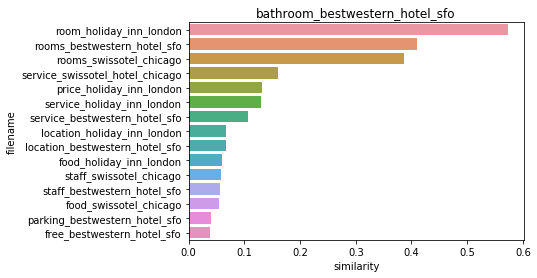

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# argsort()를 이용하여 앞예제의 첫번째 문서와 타 문서간 유사도가 큰 순으로 
# 정렬한 인덱스 반환하되 자기 자신은 제외. 
sorted_index = similarity_pair.argsort()[:,::-1]
sorted_index = sorted_index[:, 1:]

# 유사도가 큰 순으로 hotel_indexes를 추출하여 재 정렬. 
hotel_sorted_indexes = hotel_indexes[sorted_index.reshape(-1)]

# 유사도가 큰 순으로 유사도 값을 재정렬하되 자기 자신은 제외
hotel_1_sim_value = np.sort(similarity_pair.reshape(-1))[::-1]
hotel_1_sim_value = hotel_1_sim_value[1:]

# 유사도가 큰 순으로 정렬된 Index와 유사도값을 이용하여 파일명과 유사도값을 
# Seaborn 막대 그래프로 시각화
hotel_1_sim_df = pd.DataFrame()
hotel_1_sim_df['filename'] = document_df.iloc[hotel_sorted_indexes]['filename']
hotel_1_sim_df['similarity'] = hotel_1_sim_value

sns.barplot(x='similarity', y='filename',data=hotel_1_sim_df)
plt.title(comparison_docname)